# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [100]:
# Read in Original Data
library (readr)
urlfile="https://raw.githubusercontent.com/CoAxLab/DataSciencePsychNeuro/master/Homework%20datasets/hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv"
hcp <- read_csv(url(urlfile))
head(hcp)

# Make new dataframe
library(tidyverse)
data <- hcp %>% select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol)
head(data)

# drop NAs
d1 <- drop_na(data)
head(d1) 

Rows: 1206 Columns: 500
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (64): Release, Acquisition, Gender, Age, NEORAW_01, NEORAW_02, NEORAW_...
dbl  (434): Subject, MMSE_Score, PSQI_Score, PSQI_Comp1, PSQI_Comp2, PSQI_Co...
time   (2): PSQI_BedTime, PSQI_GetUpTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
100004,M,121.97,NA,NA,NA
100206,M,130.42,1864518,543134,807245
100307,F,112.56,1512540,407292,664124
100408,M,121.18,1684117,500417,726206
100610,M,126.53,1816044,512946,762308
101006,F,101.85,1437868,429449,579632


Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
100206,M,130.42,1864518,543134,807245
100307,F,112.56,1512540,407292,664124
100408,M,121.18,1684117,500417,726206
100610,M,126.53,1816044,512946,762308
101006,F,101.85,1437868,429449,579632
101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

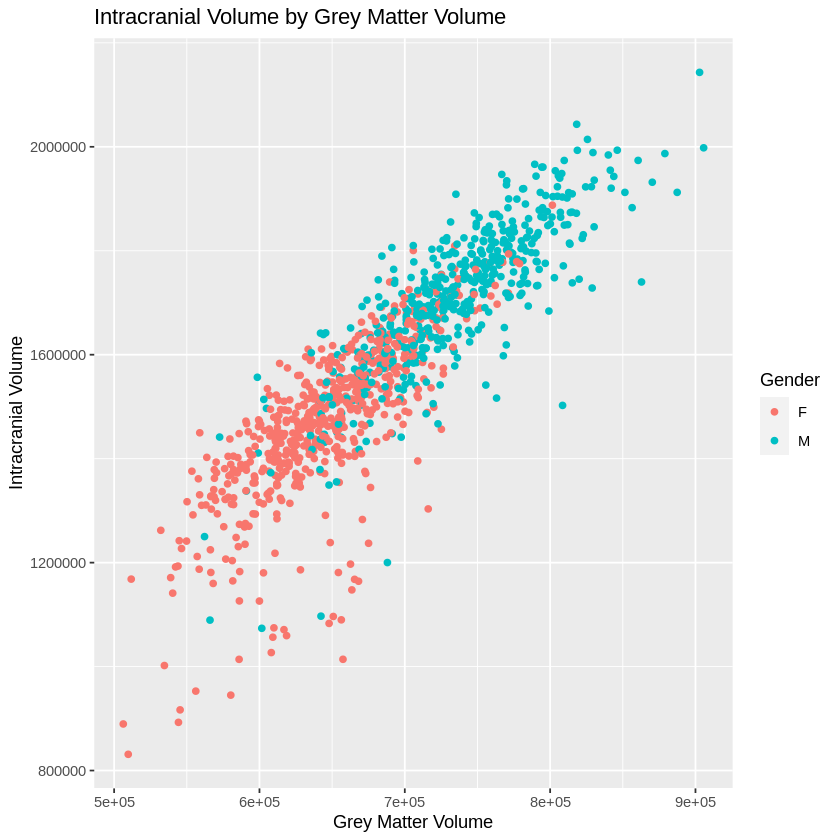

In [102]:
# Variables to plot
  # FS_Total_GM_Vol = grey matter volume
  # FS_IntraCranial_Vol = intracranial volume
  # Gender = Gender

# make scatterplot
ggplot(data = d1, aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol, color = Gender)) +
  geom_point() + 
  labs(x = "Grey Matter Volume", y = "Intracranial Volume", title = "Intracranial Volume by Grey Matter Volume")
    # I like including labels for an easier visual/ease interpretation
      # Also just good practice

What patterns do you observe in the scatter plot?

> *Overall, there is a positive trend where as grey matter volume increases, intracranial volume also increases. With respect to gender, in general, we can see that males tend to have more grey matter volume compared to females.* 

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [103]:
# make gender a factor
d1$Gender <- as.factor(d1$Gender)

# running logistic regression; didn't ask for an interaction, just effects
model1 <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = d1, family = binomial)
summary(model1)


Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> *FS_Tot_WM_Vol is not significantly associated with Gender (p = 0.48). FS_Total_GM_Vol is significantly associated with Gender (p < .001). FS_IntraCranial_Vol is significantly associated with Gender (p < .001).* 

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [105]:
# estimating prediction accuracy
glm.probs = predict(model1, d1, type="response")
glm.pred = rep(0,nrow(d1))
glm.pred[glm.probs > 0.5] = 1 # binarize our result

# confusion matrix
confusion1 = data.frame(glm.pred, d1$Gender)
colnames(confusion1) = c('predicted', 'actual')
table(confusion1) # 0 = F, 1 = M

# if == F, code as 0, if not, code as 1
confusion1$actual = ifelse(confusion1$actual == "F", 0, 1) 

print("---")
print(paste("Accuracy:", mean(confusion1$predicted == confusion1$actual)))
accuracy <- mean(confusion1$predicted == confusion1$actual) # to use for later

         actual
predicted   F   M
        0 516 110
        1  90 397

[1] "---"
[1] "Accuracy: 0.820305480682839"


What is the prediction accuracy for gender from the full model?

> *Female classification accuracy: [516/(516 + 90)] = 85.1% and Male classification accuracy: [397/(397 + 110)] = 78.3%.*
> *For the full model, the prediction accuracy for Gender is 82.0%*

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$). Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


In [106]:
library(boot)
set.seed(123)

boot_funct <- function(data, index){
# logistic regression model
  model2 <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = d1, family = "binomial", subset = index)
# generating probabilities
  probs = predict(model2, type = "response")
# generating predictions
  pred = rep("F",nrow(d1)) # F = 0, M = 1
# setting threshold
  pred[probs > 0.5] = "M"
# making confusion matrix
  confusion2 = data.frame(pred, d1$Gender[index]) # pulling just from the index
  # confusion2 = data.frame(pred, d1$Gender) # this pulls from the whole data, not bootstrapped data
# renaming columns
  colnames(confusion2) = c('predicted', 'actual')
# getting the mean prediction accuracy
  return(mean(confusion2$predicted == confusion2$actual))
}

# code is broken up into another block below for ease of running this Jupyter Notebook

In [107]:
boot_obj = boot(d1, boot_funct, R = 1000) # number of iterations/repetitions
mean(boot_obj$t) # looks good

[1] 0.8198733

In [109]:
# Calculating Confidence Interval
boot_avg <- mean(boot_obj$t)
boot_avg # looks good
boot_stdev <- sd(boot_obj$t)
  # already have std.error anyway, but recoding for ease
n <- nrow(d1)

error <- qnorm(.975) * boot_stdev/sqrt(n)
left_CI <- boot_avg - error # left CI
left_CI # 0.819138506225377
right_CI <- boot_avg + error # right CI
right_CI # 0.820631484789897

[1] 0.8198733

[1] 0.8191373

[1] 0.8206094

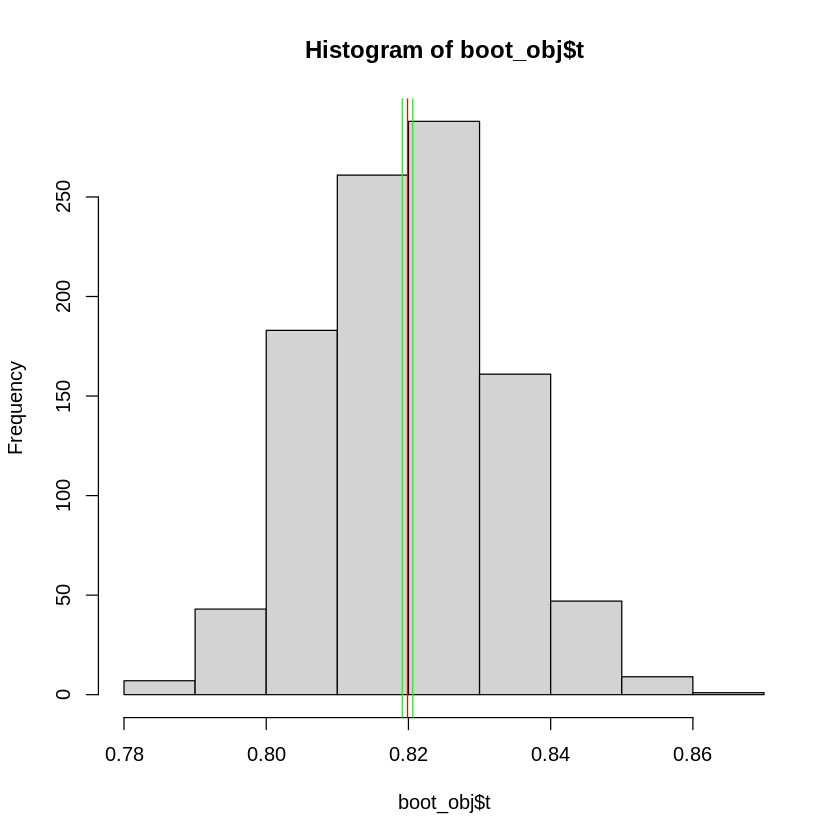

In [110]:
# make histogram
hist(boot_obj$t)
abline(v = c(left_CI, right_CI), col = "green") # CIs in green
abline(v = boot_avg, col = "red") # mean in red

How robust is the prediction accuracy of the full model?

> *The prediction accuracy of the full model is quite robust. The original accuracy calculated above from the confusion matrix (confusion1) was about 82.0% (0.8203) compared to the accuracy of about 82.0% (0.8199) calculated here. Our calculated confidence interval is quite narrow (as seen in our calculations and in the histogram above) and does not include 0.*

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

In [111]:
d2 = d1
d2_row <- nrow(d2)
R = 1000 # 1000 iterations
set.seed(123)

# create and fill a matrix with NAs
perm.coef = matrix (NA, nrow = R, ncol = 1)

# making my for loop
for (i in 1:R) {
  d2$FS_Total_GM_Vol = d1$FS_Total_GM_Vol[sample(d2_row)]
# logistic regression model3
  model3 <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = d2, family = "binomial")
# generating probabilities
  probs1 = predict(model3, type = "response")
# generating predictions
  pred1 = rep("F", nrow(d2)) # F = 0, M = 1
# setting threshold
  pred1[probs1 > 0.5] = "M"
# making confusion matrix
  confusion3 = data.frame(pred1, d2$Gender)
# renaming columns
  colnames(confusion3) = c('predicted', 'actual')
# prediction accuracy
  perm.coef[i] = mean(confusion3$predicted == confusion3$actual)
}

In [112]:
# look at calculated perm.coef
head(perm.coef) # looks good
range(perm.coef) # see range of values, looks good (~ .79 to ~ .82)
perm.coef_avg <- mean(perm.coef) # mean

0.8050314
0.8077269
0.8068284
0.8068284
0.8041330
0.8050314


[1] 0.7924528 0.8158131

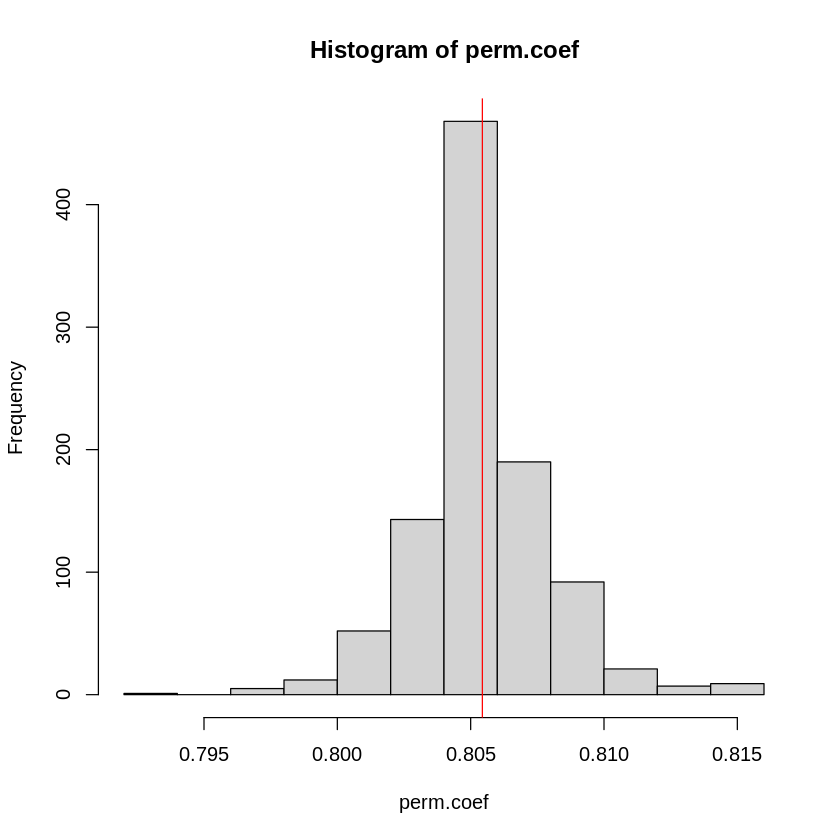

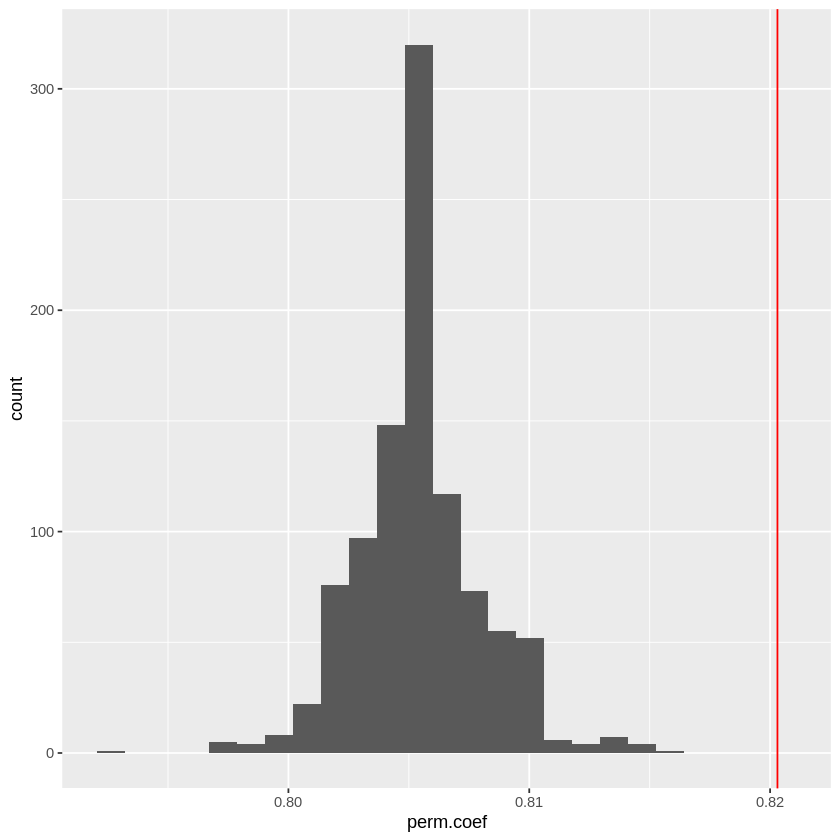

In [114]:
# make general histogram
hist(perm.coef)
abline(v = perm.coef_avg, col = "red")

# ggplot histogram to compare
ggplot() + geom_histogram(bins = 25, aes(x = perm.coef)) +
   geom_vline(xintercept = accuracy, color = "red")

How much does the grey matter volume influence the prediction accuracy of the model?

> *FS_Total_GM_Vol does significantly influence the prediction accuracy of the model (model3). Our originally calculated prediction accuracy (seen as "accuracy" here) is at the upper bound of the distribution, as seen in the above histogram. This appears to suggest that the true prediction accuracy comes from a distribution other than the null distribution.*

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> *BOOTSTRAPPING* 

> *Bootstrapping is resampling with replacement and assumes that we can create multiple samples that maintain relationship between X and Y variables. With this, we are relying on the fact that our one sample we are pulling from is as random as possible. For bootstrapping, you take your original data frame and create a "new" data frame where some rows are dropped and others are repeated, providing a new distribution to draw from when computing various statistics from your data. When selecting data points, it's an independent process where each case has an equal chance of being selected into a bootstrapped sample. By just reshuffling information, we are not changing the degree of said information in any way, just replicating the same data set over and over.*

> *PERMUTATION TEST*

> *Permutation testing is resampling without replacement; with permutation testing, we resample from one sample space and assume that there is a random relationship with X and Y variables (that we are also able to scramble). For permutation testing, you do not remove or duplicate any observations from your data frame, but are actually redistribute your data. We are quantifying the null distribution (aka its mean and variance) and our observations are exchangeable under the null hypothesis. By creating a null distribution for a specific dataset, we don't want to replace values in order to avoid over representing certain case values. Permutation testing can apply to many statistical methodologies like correlation and regression.*

> *TAKE AWAY*

> *Bootstrapping is great for bias correction, basic hypothesis testing, and to establish more stable parameter estimation of your data overall. Permutation testing can apply to many statistical methodologies like correlation and regression. Permutation testing is most useful when you're examining your null hypothesis.*

**DUE:** 5pm EST, March 29, 2023, but I got an extension until Friday, March 31st

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Sara Jaramillo*